In [1]:
#%matplotlib inline 
import numpy as np

from PPwL_activation import PPwL, min_max_bound

from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Load pima indians dataset from https://www.kaggle.com/kumargh/pimaindiansdiabetescsv
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')

In [3]:
# split into input (X) and output (Y) variables
X = dataset[:, 0:8]
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)
Y = dataset[:, 8]

In [5]:
# 5 layer network with 32 nodes in the first four layers and 16 in the fifth layer. 
# Each hidden layer is activate with PPwL activations with the parameters bound between [0, 1].
# The output layer is a single sigmoid-activated node.
model = Sequential()
model.add(Dense(32, input_shape=(8,)))
model.add(PPwL(alpha_constraint=min_max_bound(), beta_constraint=min_max_bound()))
model.add(Dense(32))
model.add(PPwL(alpha_constraint=min_max_bound(), beta_constraint=min_max_bound()))
model.add(Dense(32))
model.add(PPwL(alpha_constraint=min_max_bound(), beta_constraint=min_max_bound()))
model.add(Dense(32))
model.add(PPwL(alpha_constraint=min_max_bound(), beta_constraint=min_max_bound()))
model.add(Dense(16))
model.add(PPwL(alpha_constraint=min_max_bound(), beta_constraint=min_max_bound()))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
p_pw_l_1 (PPwL)              (None, 32)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
p_pw_l_2 (PPwL)              (None, 32)                64        
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
p_pw_l_3 (PPwL)              (None, 32)                64        
_________________________________________________________________
dens

In [6]:
# Training hyper-parameters were not optimized
model.fit(X, Y, epochs=1000, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
768/768 [==============================] - 1s 1ms/step - loss: 0.6239 - acc: 0.6523
Epoch 2/1000
768/768 [==============================] - 0s 92us/step - loss: 0.4838 - acc: 0.7734
Epoch 3/1000
768/768 [==============================] - 0s 92us/step - loss: 0.4766 - acc: 0.7734
Epoch 4/1000
768/768 [==============================] - 0s 83us/step - loss: 0.4773 - acc: 0.7786
Epoch 5/1000
768/768 [==============================] - 0s 81us/step - loss: 0.4766 - acc: 0.7747
Epoch 6/1000
768/768 [==============================] - 0s 90us/step - loss: 0.4771 - acc: 0.7852
Epoch 7/1000
768/768 [==============================] - 0s 84us/step - loss: 0.4814 - acc: 0.7695
Epoch 8/1000
768/768 [==============================] - 0s 84us/step - loss: 0.4847 - acc: 0.7669
Epoch 9/1000
768/768 [==============================] - 0s 82us/step - loss: 0.4785 - acc: 0.7760
Epoch 10/1000
768/768 [==============================] - 0s 79us/step -

768/768 [==============================] - 0s 80us/step - loss: 0.4328 - acc: 0.7904
Epoch 81/1000
768/768 [==============================] - 0s 78us/step - loss: 0.4362 - acc: 0.7826
Epoch 82/1000
768/768 [==============================] - 0s 79us/step - loss: 0.4307 - acc: 0.7956
Epoch 83/1000
768/768 [==============================] - 0s 78us/step - loss: 0.4274 - acc: 0.7852
Epoch 84/1000
768/768 [==============================] - 0s 77us/step - loss: 0.4256 - acc: 0.7904
Epoch 85/1000
768/768 [==============================] - 0s 81us/step - loss: 0.4292 - acc: 0.7865
Epoch 86/1000
768/768 [==============================] - 0s 81us/step - loss: 0.4258 - acc: 0.7956
Epoch 87/1000
768/768 [==============================] - 0s 88us/step - loss: 0.4266 - acc: 0.7943
Epoch 88/1000
768/768 [==============================] - 0s 78us/step - loss: 0.4273 - acc: 0.7930
Epoch 89/1000
768/768 [==============================] - 0s 80us/step - loss: 0.4261 - acc: 0.7943
Epoch 90/1000
768/768 [=

768/768 [==============================] - 0s 78us/step - loss: 0.3523 - acc: 0.8424
Epoch 163/1000
768/768 [==============================] - 0s 79us/step - loss: 0.3514 - acc: 0.8490
Epoch 164/1000
768/768 [==============================] - 0s 79us/step - loss: 0.3516 - acc: 0.8411
Epoch 165/1000
768/768 [==============================] - 0s 80us/step - loss: 0.3543 - acc: 0.8438
Epoch 166/1000
768/768 [==============================] - 0s 80us/step - loss: 0.3542 - acc: 0.8438
Epoch 167/1000
768/768 [==============================] - 0s 84us/step - loss: 0.3475 - acc: 0.8438
Epoch 168/1000
768/768 [==============================] - 0s 81us/step - loss: 0.3515 - acc: 0.8503
Epoch 169/1000
768/768 [==============================] - 0s 81us/step - loss: 0.3426 - acc: 0.8464
Epoch 170/1000
768/768 [==============================] - 0s 81us/step - loss: 0.3505 - acc: 0.8372
Epoch 171/1000
768/768 [==============================] - 0s 80us/step - loss: 0.3397 - acc: 0.8490
Epoch 172/1000


768/768 [==============================] - 0s 87us/step - loss: 0.2091 - acc: 0.9180
Epoch 245/1000
768/768 [==============================] - 0s 82us/step - loss: 0.2106 - acc: 0.9180
Epoch 246/1000
768/768 [==============================] - 0s 79us/step - loss: 0.2102 - acc: 0.9180
Epoch 247/1000
768/768 [==============================] - 0s 78us/step - loss: 0.2165 - acc: 0.9180
Epoch 248/1000
768/768 [==============================] - 0s 78us/step - loss: 0.2111 - acc: 0.9193
Epoch 249/1000
768/768 [==============================] - 0s 77us/step - loss: 0.2131 - acc: 0.9180
Epoch 250/1000
768/768 [==============================] - 0s 76us/step - loss: 0.2037 - acc: 0.9310
Epoch 251/1000
768/768 [==============================] - 0s 76us/step - loss: 0.1989 - acc: 0.9323
Epoch 252/1000
768/768 [==============================] - 0s 80us/step - loss: 0.2048 - acc: 0.9284
Epoch 253/1000
768/768 [==============================] - 0s 81us/step - loss: 0.2120 - acc: 0.9141
Epoch 254/1000


768/768 [==============================] - 0s 84us/step - loss: 0.0739 - acc: 0.9831
Epoch 327/1000
768/768 [==============================] - 0s 89us/step - loss: 0.0676 - acc: 0.9831
Epoch 328/1000
768/768 [==============================] - 0s 89us/step - loss: 0.0913 - acc: 0.9609
Epoch 329/1000
768/768 [==============================] - 0s 80us/step - loss: 0.0963 - acc: 0.9661
Epoch 330/1000
768/768 [==============================] - 0s 90us/step - loss: 0.1050 - acc: 0.9583
Epoch 331/1000
768/768 [==============================] - 0s 86us/step - loss: 0.0753 - acc: 0.9779
Epoch 332/1000
768/768 [==============================] - 0s 88us/step - loss: 0.0740 - acc: 0.9753
Epoch 333/1000
768/768 [==============================] - 0s 85us/step - loss: 0.0820 - acc: 0.9674
Epoch 334/1000
768/768 [==============================] - 0s 81us/step - loss: 0.0636 - acc: 0.9844
Epoch 335/1000
768/768 [==============================] - 0s 86us/step - loss: 0.0668 - acc: 0.9779
Epoch 336/1000


768/768 [==============================] - 0s 79us/step - loss: 0.0117 - acc: 0.9987
Epoch 409/1000
768/768 [==============================] - 0s 76us/step - loss: 0.0098 - acc: 1.0000
Epoch 410/1000
768/768 [==============================] - 0s 78us/step - loss: 0.0090 - acc: 1.0000
Epoch 411/1000
768/768 [==============================] - 0s 79us/step - loss: 0.0086 - acc: 1.0000
Epoch 412/1000
768/768 [==============================] - 0s 75us/step - loss: 0.0081 - acc: 0.9987
Epoch 413/1000
768/768 [==============================] - 0s 79us/step - loss: 0.0110 - acc: 0.9974
Epoch 414/1000
768/768 [==============================] - 0s 79us/step - loss: 0.0101 - acc: 0.9987
Epoch 415/1000
768/768 [==============================] - 0s 77us/step - loss: 0.0077 - acc: 1.0000
Epoch 416/1000
768/768 [==============================] - 0s 76us/step - loss: 0.0108 - acc: 0.9987
Epoch 417/1000
768/768 [==============================] - 0s 76us/step - loss: 0.0099 - acc: 1.0000
Epoch 418/1000


768/768 [==============================] - 0s 84us/step - loss: 0.0033 - acc: 1.0000
Epoch 491/1000
768/768 [==============================] - 0s 82us/step - loss: 0.0034 - acc: 1.0000
Epoch 492/1000
768/768 [==============================] - 0s 79us/step - loss: 0.0029 - acc: 1.0000
Epoch 493/1000
768/768 [==============================] - 0s 79us/step - loss: 0.0028 - acc: 1.0000
Epoch 494/1000
768/768 [==============================] - 0s 80us/step - loss: 0.0027 - acc: 1.0000
Epoch 495/1000
768/768 [==============================] - 0s 79us/step - loss: 0.0025 - acc: 1.0000
Epoch 496/1000
768/768 [==============================] - 0s 80us/step - loss: 0.0027 - acc: 1.0000
Epoch 497/1000
768/768 [==============================] - 0s 80us/step - loss: 0.0025 - acc: 1.0000
Epoch 498/1000
768/768 [==============================] - 0s 79us/step - loss: 0.0025 - acc: 1.0000
Epoch 499/1000
768/768 [==============================] - 0s 84us/step - loss: 0.0029 - acc: 1.0000
Epoch 500/1000


768/768 [==============================] - 0s 79us/step - loss: 6.4085e-04 - acc: 1.0000
Epoch 572/1000
768/768 [==============================] - 0s 79us/step - loss: 6.5093e-04 - acc: 1.0000
Epoch 573/1000
768/768 [==============================] - 0s 78us/step - loss: 0.0012 - acc: 1.0000
Epoch 574/1000
768/768 [==============================] - 0s 80us/step - loss: 0.0011 - acc: 1.0000
Epoch 575/1000
768/768 [==============================] - 0s 79us/step - loss: 7.4576e-04 - acc: 1.0000
Epoch 576/1000
768/768 [==============================] - 0s 78us/step - loss: 6.2421e-04 - acc: 1.0000
Epoch 577/1000
768/768 [==============================] - 0s 79us/step - loss: 5.8965e-04 - acc: 1.0000
Epoch 578/1000
768/768 [==============================] - 0s 78us/step - loss: 5.3820e-04 - acc: 1.0000
Epoch 579/1000
768/768 [==============================] - 0s 79us/step - loss: 5.3473e-04 - acc: 1.0000
Epoch 580/1000
768/768 [==============================] - 0s 77us/step - loss: 5.8204e-

768/768 [==============================] - 0s 79us/step - loss: 0.0017 - acc: 1.0000
Epoch 653/1000
768/768 [==============================] - 0s 80us/step - loss: 0.0016 - acc: 1.0000
Epoch 654/1000
768/768 [==============================] - 0s 77us/step - loss: 0.0016 - acc: 1.0000
Epoch 655/1000
768/768 [==============================] - 0s 77us/step - loss: 0.0015 - acc: 1.0000
Epoch 656/1000
768/768 [==============================] - 0s 79us/step - loss: 0.0015 - acc: 1.0000
Epoch 657/1000
768/768 [==============================] - 0s 81us/step - loss: 0.0015 - acc: 1.0000
Epoch 658/1000
768/768 [==============================] - 0s 78us/step - loss: 0.0015 - acc: 1.0000
Epoch 659/1000
768/768 [==============================] - 0s 79us/step - loss: 0.0015 - acc: 1.0000
Epoch 660/1000
768/768 [==============================] - 0s 82us/step - loss: 0.0014 - acc: 1.0000
Epoch 661/1000
768/768 [==============================] - 0s 78us/step - loss: 0.0014 - acc: 1.0000
Epoch 662/1000


768/768 [==============================] - 0s 77us/step - loss: 4.6287e-04 - acc: 1.0000
Epoch 733/1000
768/768 [==============================] - 0s 76us/step - loss: 4.3555e-04 - acc: 1.0000
Epoch 734/1000
768/768 [==============================] - 0s 78us/step - loss: 4.3325e-04 - acc: 1.0000
Epoch 735/1000
768/768 [==============================] - 0s 75us/step - loss: 4.1776e-04 - acc: 1.0000
Epoch 736/1000
768/768 [==============================] - 0s 81us/step - loss: 4.1087e-04 - acc: 1.0000
Epoch 737/1000
768/768 [==============================] - 0s 80us/step - loss: 4.0525e-04 - acc: 1.0000
Epoch 738/1000
768/768 [==============================] - 0s 76us/step - loss: 3.9658e-04 - acc: 1.0000
Epoch 739/1000
768/768 [==============================] - 0s 80us/step - loss: 3.9113e-04 - acc: 1.0000
Epoch 740/1000
768/768 [==============================] - 0s 90us/step - loss: 3.8776e-04 - acc: 1.0000
Epoch 741/1000
768/768 [==============================] - 0s 82us/step - loss: 

768/768 [==============================] - 0s 82us/step - loss: 1.4663e-04 - acc: 1.0000
Epoch 811/1000
768/768 [==============================] - 0s 86us/step - loss: 1.4008e-04 - acc: 1.0000
Epoch 812/1000
768/768 [==============================] - 0s 80us/step - loss: 1.3491e-04 - acc: 1.0000
Epoch 813/1000
768/768 [==============================] - 0s 80us/step - loss: 1.3949e-04 - acc: 1.0000
Epoch 814/1000
768/768 [==============================] - 0s 80us/step - loss: 1.3638e-04 - acc: 1.0000
Epoch 815/1000
768/768 [==============================] - 0s 86us/step - loss: 1.3203e-04 - acc: 1.0000
Epoch 816/1000
768/768 [==============================] - 0s 83us/step - loss: 1.2828e-04 - acc: 1.0000
Epoch 817/1000
768/768 [==============================] - 0s 84us/step - loss: 1.2682e-04 - acc: 1.0000
Epoch 818/1000
768/768 [==============================] - 0s 79us/step - loss: 1.2636e-04 - acc: 1.0000
Epoch 819/1000
768/768 [==============================] - 0s 82us/step - loss: 

768/768 [==============================] - 0s 83us/step - loss: 4.7680e-05 - acc: 1.0000
Epoch 889/1000
768/768 [==============================] - 0s 79us/step - loss: 4.7616e-05 - acc: 1.0000
Epoch 890/1000
768/768 [==============================] - 0s 78us/step - loss: 4.8738e-05 - acc: 1.0000
Epoch 891/1000
768/768 [==============================] - 0s 80us/step - loss: 4.6964e-05 - acc: 1.0000
Epoch 892/1000
768/768 [==============================] - 0s 82us/step - loss: 4.6231e-05 - acc: 1.0000
Epoch 893/1000
768/768 [==============================] - 0s 80us/step - loss: 4.3949e-05 - acc: 1.0000
Epoch 894/1000
768/768 [==============================] - 0s 81us/step - loss: 4.4055e-05 - acc: 1.0000
Epoch 895/1000
768/768 [==============================] - 0s 79us/step - loss: 4.3090e-05 - acc: 1.0000
Epoch 896/1000
768/768 [==============================] - 0s 82us/step - loss: 4.3511e-05 - acc: 1.0000
Epoch 897/1000
768/768 [==============================] - 0s 81us/step - loss: 

768/768 [==============================] - 0s 82us/step - loss: 1.6777e-05 - acc: 1.0000
Epoch 967/1000
768/768 [==============================] - 0s 81us/step - loss: 1.6446e-05 - acc: 1.0000
Epoch 968/1000
768/768 [==============================] - 0s 83us/step - loss: 1.6736e-05 - acc: 1.0000
Epoch 969/1000
768/768 [==============================] - 0s 78us/step - loss: 1.5547e-05 - acc: 1.0000
Epoch 970/1000
768/768 [==============================] - 0s 79us/step - loss: 1.5238e-05 - acc: 1.0000
Epoch 971/1000
768/768 [==============================] - 0s 82us/step - loss: 1.6243e-05 - acc: 1.0000
Epoch 972/1000
768/768 [==============================] - 0s 79us/step - loss: 1.5442e-05 - acc: 1.0000
Epoch 973/1000
768/768 [==============================] - 0s 80us/step - loss: 1.4709e-05 - acc: 1.0000
Epoch 974/1000
768/768 [==============================] - 0s 79us/step - loss: 1.5006e-05 - acc: 1.0000
Epoch 975/1000
768/768 [==============================] - 0s 80us/step - loss: 

In [33]:
n_layers = 5
print_params = False

xs = np.arange(-1, 2, 0.01)  # X-axis 
w = model.get_weights()

def PPwL_fn(x, a=1.0, b=1.0):
    """Functional form of PPwL for plotting."""
    pos = np.where(x > 1, (x - 1) * b + 1, x)
    return np.where(x < 0, a * x, pos)

Hidden layer 0: n nodes 32


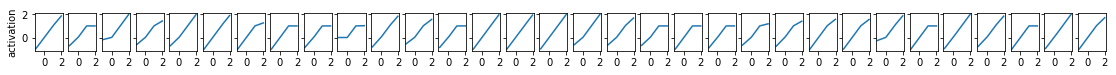

Hidden layer 1: n nodes 32


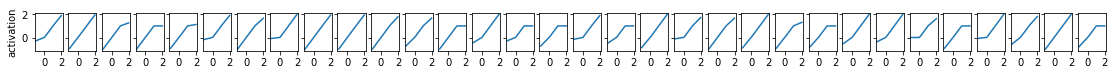

Hidden layer 2: n nodes 32


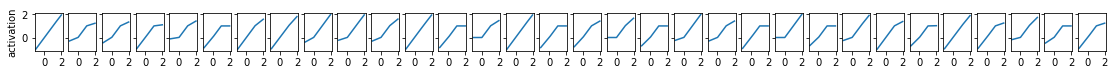

Hidden layer 3: n nodes 32


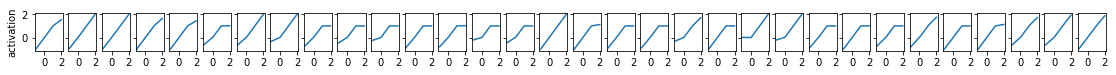

Hidden layer 4: n nodes 16


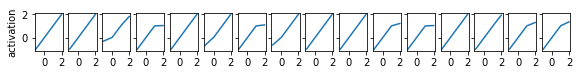

In [37]:
# Plot the activation functions
for layer in range(n_layers):
    ix = layer * 4 + 2
    alphas, betas = w[ix], w[ix + 1]
    n_plots = alphas.shape[0]
    
    print('Hidden layer {}: n nodes {}'.format(layer, n_plots))
    if print_params:
        print('--------------------------------------')
        print('alpha and beta parameters - layer {} (n = {}):'.format(layer, n_plots))
        print(alphas) # first layer alpha
        print(betas) # first layer beta

    fig, axes = plt.subplots(1, n_plots, sharey=True, figsize=(0.6 * n_plots, 0.7))
    for ax, a, b in zip(axes.flat, alphas, betas):
        ax.plot(xs, PPwL_fn(xs, a=a, b=b))

    axes[0].set_ylabel('activation', size=10)
    plt.show()

After 1'000 epochs, we can already see the range of non-linearities these activation functions take. As I did not spend any time tuning the model, I have no evidence whether this activation function is useful.

Hidden layer 0: n nodes 25


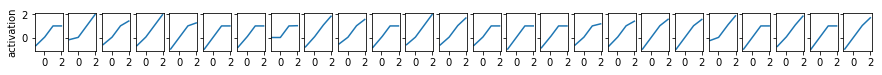

Hidden layer 1: n nodes 26


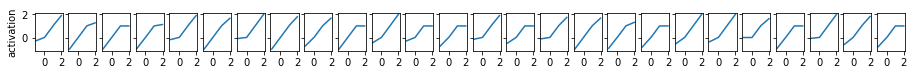

Hidden layer 2: n nodes 28


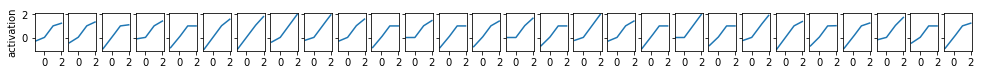

Hidden layer 3: n nodes 28


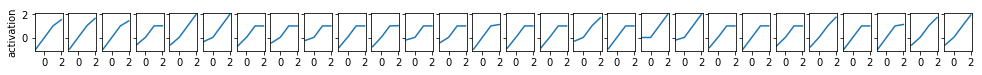

Hidden layer 4: n nodes 9


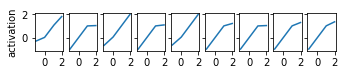

In [38]:
# Plot only those activation functions which are approximately non-linear
for layer in range(n_layers):
    ix = layer * 4 + 2
    alphas_betas = [(a, b) for a, b in zip(w[ix], w[ix + 1]) if (a < 0.85) or (b < 0.85)]  # Set threshold
    n_plots = len(alphas_betas)
    
    print('Hidden layer {}: n nodes {}'.format(layer, n_plots))
    if print_params:
        print('--------------------------------------')
        print('alpha and beta parameters - layer {} (n = {}):'.format(layer, n_plots))
        print(alphas_betas) # first layer alpha

    fig, axes = plt.subplots(1, n_plots, sharey=True, figsize=(0.6 * n_plots, 0.7))
    for ax, (a, b) in zip(axes.flat, alphas_betas):
        ax.plot(xs, PPwL_fn(xs, a=a, b=b))

    axes[0].set_ylabel('activation', size=10)
    plt.show()

If we drop those which are approximately linear (threshold (a,b < 0.85) tuned by visually inspecting activation function), a new neural network architecture is revealed. We dropped 7, 6, 5, 5, and 7 nodes in the first, second, third, fourth, and fifth hidden layers, respectively.

If I ever get the chance I will use these in a real setting to get a better feel for their value.